# 33.Recursive, update and anonymous calls
# 33. Llamadas recursivas, de actualización y anónimas

In [1]:
%%html
<marquee direction="right"><b>simple cases</b></marquee>

In [2]:
def print_countdown(n):
    print(n, end=' ')
    if n == 0: print(); return
    else: print_countdown(n - 1)
print_countdown(10)

10 9 8 7 6 5 4 3 2 1 0 


In [3]:
def loop_countdown(n):
    while n > -1:
        yield n
        n -= 1
print(list(loop_countdown(10)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [4]:
def recursive_countdown(x):
    if (x > -1):
        yield x
        yield from recursive_countdown(x - 1)
print(tuple(recursive_countdown(10)))

(10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)


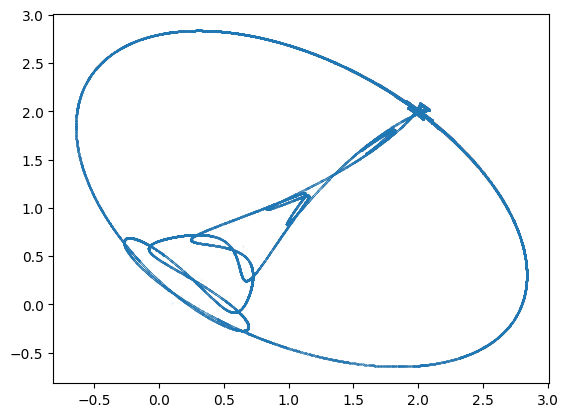

In [5]:
import pylab
def recursive_tab(n):
    i = 1; xyi = [.1, .01]
    while i <= n:
        yield xyi
        i += 1; xi, yi = xyi[0], xyi[1]
        xyi = [xi + .684 * (xi - xi ** 2 + yi),
               yi + .684 * (yi - yi ** 2 + xi)]
n = 10 ** 5
xy = list(recursive_tab(n))
pylab.scatter(
    [xy[i][0] for i in range(n)], [xy[i][1] for i in range(n)], s=.005);

In [6]:
%%html
<marquee direction="right"><b>string operations</b></marquee>

In [7]:
reverse_str = lambda s: s if len(s) <= 1 else reverse_str(s[1:]) + s[0]
print(reverse_str('12345'))

54321


In [8]:
code_str = ("is_palindrome = lambda w: True if len(w) <= 1 else "
            "is_palindrome(w[1:-1]) if w[0] == w[-1] else False")
exec(code_str)
is_palindrome('radar')

True

In [9]:
def remove_whitespace(s):
    if s:
        return s[0] * (not s[0].isspace()) + remove_whitespace(s[1:])
    else:
        return ''
remove_whitespace('hello hola hey oye 123')

'helloholaheyoye123'

In [10]:
remove_space = lambda s: s[0]*(s[0] != ' ') + remove_space(s[1:]) if s else ''
remove_space('hello hola hey oye')

'helloholaheyoye'

In [11]:
def count_substr(s, sub):
    if len(s) < len(sub):
        return 0
    else:
        c = s[:len(sub)]==sub
        return c + count_substr(s[c*len(sub)+(not c):], sub)
count_substr('hello hola hey oye 123 ho ho', 'ho')

3

In [12]:
%%timeit
def loop_count_substr1(s, sub):
    count = 0
    start = 0
    while len(s) - start >= len(sub):
        if s[start:start + len(sub)] == sub:
            count += 1
            start += len(sub)
        else:
            start += 1
    return count
loop_count_substr1('hello hola hey oye 123 ho ho', 'ho')

12.5 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%%timeit
def loop_count_substr2(s, sub):
    count, start = 0, 0
    while len(s) - start >= len(sub):
        c = s[start:start+len(sub)] == sub
        count += c
        start += c * len(sub) + (not c)
    return count
loop_count_substr2('hello hola hey oye 123 ho ho', 'ho')

20.4 µs ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%%timeit
def replace_substr1(s, old, new):
    if not s: return ''
    n = len(old)
    if s[:n] == old:
        return new + replace_substr1(s[n:], old, new)
    else:
        return s[0] + replace_substr1(s[1:], old, new)
replace_substr1('hello hola hey oye', 'he', '**')

19.6 µs ± 5.29 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
%%timeit
def replace_substr2(s, old, new):
    if not s: return ''
    n = len(old)
    cond = s[:n] == old
    start = cond * new + (not cond) * s[0]
    k = cond * n + (not cond)
    return start + replace_substr2(s[k:], old, new)
replace_substr2('hello hola hey oye', 'he', '**')

10.3 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
def length_lc_substr(str1, str2) :
    m, n = len(str1), len(str2)
    length = 0
    tab = [[0 for _ in range(n)] for _ in range(2)]
    current_i = 0
    for i in range(m) :
        for j in range(n) :
            if (i == 0 | j == 0) :
                tab[current_i][j] = 0
            elif (str1[i-1] == str2[j-1]) :
                tab[current_i][j] = tab[1-current_i][j-1] + 1
                length = max(length, tab[current_i][j])
            else :
                tab[current_i][j] = 0
        current_i = 1 - current_i
#        print(tab)
    return length
length_lc_substr('greetings saludos hello hola hey oye', 'hello, world')

5

In [17]:
%%html
<marquee direction="right"><b>factorial</b></marquee>

In [18]:
recursive_factorial = lambda n: 1 if n-1 < 1 else n * recursive_factorial(n - 1)
print([[i, recursive_factorial(i)] for i in range(10)])

[[0, 1], [1, 1], [2, 2], [3, 6], [4, 24], [5, 120], [6, 720], [7, 5040], [8, 40320], [9, 362880]]


In [19]:
def recursive_factorial2(n, k=1):
    if n < 2: return k
    return recursive_factorial2(n-1, n*k)
print([recursive_factorial2(i) for i in range(10)])

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


In [20]:
def recursive_factorial_inf(n, k):
    yield (n - 1, k)
    yield from recursive_factorial_inf(n + 1, n * k)
fi = recursive_factorial_inf(1, 1)
for i in range(10): print(next(fi), end=' ')

(0, 1) (1, 1) (2, 2) (3, 6) (4, 24) (5, 120) (6, 720) (7, 5040) (8, 40320) (9, 362880) 

In [21]:
factorial = 1
def loop_factorial(n, factorial=factorial):
    while True:
        factorial *= n
        n -= 1
        if n == 0: break
    return factorial
print(loop_factorial(9))
factorial = 2
# the default argument will not be changed
# el argumento predeterminado no se cambiará
print(loop_factorial(9))

362880
362880


In [22]:
def loop_factorial2(n):
    a, i = 1, 2
    while n > i - 2:
        yield a
        a *= i; i += 1
print(list(loop_factorial2(9)))
def loop_factorial3(start=0, end=10):
    if start == 0:
        yield start + 1
    for i in range(start, end+1):
        start *= i; yield start
print(list(loop_factorial3(1, 9)))

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880]
[1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


In [23]:
%%html
<marquee direction="right"><b>fibonacci</b></marquee>

In [24]:
rec_fib = lambda n: n if n <= 1 else rec_fib(n-2) + rec_fib(n-1)
print([rec_fib(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [25]:
# golden ratio
rec_fib2 = lambda n: n if n<2 else n-1 if n<5 else round(rec_fib2(n-1)*1.618)
print([rec_fib2(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [26]:
# golden ratio
rec_fib3 = lambda n: n if n<2 else n-1 if n<5 else round(rec_fib3(n-1)**2/rec_fib3(n-2)+10e-6)
print([rec_fib3(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [27]:
import functools, time
def recursive_fibonacci(n):
    if n <= 1:
        return n
    else:
        return recursive_fibonacci(n-1) + recursive_fibonacci(n-2)
begin = time.time()
print(f'{recursive_fibonacci(30) = }')
end = time.time()
print(f'timer: {end - begin: .8f}\n')
@functools.lru_cache(maxsize=None)
def cache_recursive_fibonacci(n):
    if n <= 1:
        return n
    else:
        return cache_recursive_fibonacci(n-1) + cache_recursive_fibonacci(n-2)
begin = time.time()
print(f'{cache_recursive_fibonacci(30) = }')
end = time.time()
print(f'timer: {end - begin: .8f}\n')

recursive_fibonacci(30) = 832040
timer:  0.59890580

cache_recursive_fibonacci(30) = 832040
timer:  0.00013351



In [28]:
def recursive_fibonacci2(n, arr=[0, 1]):
    if len(arr) <= n:
        arr.append(recursive_fibonacci2(n-2) + recursive_fibonacci2(n-1))
    return arr[n]
print([recursive_fibonacci2(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [29]:
def recursive_fibonacci3(n, arr=[0, 1]):
    if len(arr) <= n:
        arr.append(recursive_fibonacci3(n-1)[-2] + recursive_fibonacci3(n-1)[-1])
    return arr[:n+1]
print(recursive_fibonacci3(9))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [30]:
def recursive_fibonacci4(n, memo={0:0, 1:1}):
    if n > 1:
        memo[n] = recursive_fibonacci4(n-1) + recursive_fibonacci4(n-2)
    return memo[n]
print([recursive_fibonacci4(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [31]:
def recursive_fibonacci5(n, a=0, b=1):
    if n == 0: return a
    if n == 1: return b
    return recursive_fibonacci5(n-1, b, a+b)
print([recursive_fibonacci5(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [32]:
# golden ratio
def recursive_fibonacci6(n, gr=1.618):
    if n < 2: return n
    if n < 5: return n-1
    return round(recursive_fibonacci6(n-1) * gr)
print([recursive_fibonacci6(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [33]:
def recursive_fibonacci_inf(x, y):
    yield (x, y)
    yield from recursive_fibonacci_inf(y, x + y)
fi = recursive_fibonacci_inf(0, 1)
for i in range(10): print(next(fi), end=' ')

(0, 1) (1, 1) (1, 2) (2, 3) (3, 5) (5, 8) (8, 13) (13, 21) (21, 34) (34, 55) 

In [34]:
def loop_fibonacci(n):
    x, y = 0, 1
    for _ in range(n):
        yield x
        x, y = y, x + y
print(list(loop_fibonacci(10)))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [35]:
def loop_fibonacci2(x, y, stop_index=10):
    index = 0
    while True:
        if index == stop_index: return
        else:
            yield x
            index += 1
            x, y = y, x + y
print(list(loop_fibonacci2(0, 1)))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [36]:
def loop_fibonacci3(n):
    arr = [0, 1]
    for i in range(2, n+1):
        arr.append(arr[i-1] + arr[i-2])
    return arr[n]
print([loop_fibonacci3(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [37]:
# golden ratio
def loop_fibonacci4(n, gr=1.618):
    if n < 2: return n
    if n < 5: return n-1
    result, p = 5, 5
    while p < n:
        result = round(result * gr)
        p += 1
    return result
print([loop_fibonacci4(i) for i in range(20)])


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [38]:
def fib_multiply(F, M):
    f00 = F[0][0] * M[0][0] + F[0][1] * M[1][0]
    f01 = F[0][0] * M[0][1] + F[0][1] * M[1][1]
    f10 = F[1][0] * M[0][0] + F[1][1] * M[1][0]
    f11 = F[1][0] * M[0][1] + F[1][1] * M[1][1]
    F[0][0], F[0][1], F[1][0], F[1][1] = f00, f01, f10, f11
def fib_power(F, n):
    if n < 2: return
    fib_power(F, n // 2)
    fib_multiply(F, F)
    if n % 2 != 0:
        fib_multiply(F, [[1, 1], [1, 0]])
def matrix_fibonacci(n):
    if n == 0: return 0
    F = [[1, 1], [1, 0]]
    fib_power(F, n - 1)
    return F[0][0]
print([matrix_fibonacci(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [39]:
%%html
<marquee direction="right"><b>math operations</b></marquee>

In [40]:
recursive_sum = lambda n: 0 if n == 0 else n + recursive_sum(n - 1)
n_sum = lambda n: (n + 1) * n // 2
' | '.join([str([recursive_sum(i), n_sum(i)]) for i in range(7)])

'[0, 0] | [1, 1] | [3, 3] | [6, 6] | [10, 10] | [15, 15] | [21, 21]'

In [41]:
%%timeit
recursive_digit_sum = lambda n: n if n<10 else (n%10) + recursive_digit_sum(n//10)
recursive_digit_sum(123456789123456789123456789)
recursive_exponent = lambda x, n: 1 if n==0 else x*recursive_exponent(x, n-1)
recursive_exponent(3, 101)

24.6 µs ± 919 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [42]:
def recursive_digit_sum2(n, summation=0):
    if n < 10: return n + summation
    else: return recursive_digit_sum2(n//10, summation + n%10)
recursive_digit_sum2(123456789123456789123456789)

135

In [43]:
%%timeit
def loop_digit_sum(n, s=0):
    while n > 0: s += n % 10; n = n // 10
    return s
loop_digit_sum(123456789123456789123456789)
def loop_exponent(x, n, p=1):
    while n > 0: p *= x; n -= 1
    return p
loop_exponent(3, 101)

17 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
bin_to_decimal = lambda n: n if n < 2 else (n % 10) + 2 * bin_to_decimal(n // 10)
print(bin_to_decimal(11000011010100001) == int('11000011010100001', base=2))
oct_to_decimal = lambda n: n if n < 8 else (n % 10) + 8 * oct_to_decimal(n // 10)
print(oct_to_decimal(7771) == int('7771', base=8))

True
True


In [45]:
decimal_to_bin = lambda n: '0b' if n == 0 else decimal_to_bin(n // 2) + str(n % 2)
print(decimal_to_bin(100001) == bin(100001))
decimal_to_oct = lambda n: '0o' if n == 0 else decimal_to_oct(n // 8) + str(n % 8)
print(decimal_to_oct(100001) == oct(100001))

True
True


In [46]:
%%timeit
def recursive_power(base, pow):
    if (base == 1) or (pow == 0): return 1
    else: return base * recursive_power(base, pow - 1)
recursive_power(9, 300)

68.1 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
rec_pow = lambda b, p: 1 if p==0 else b*rec_pow(b, p//2)**2 if p&1 else rec_pow(b, p//2)**2
x = str(rec_pow(9, 300))
for i in range(4): print(x[80*i:80*(i+1)])

18739277038847939886754019920358123424308469030992781557966909983211910963157763
67872612015446903085680773058797185991037906908769311905108513956621737063508338
49436138680295452568971179986081568436994650932937658331413095266963571426008669
35689483770877815014461194837692223879905132001


In [48]:
%%timeit
def recursive_power2(base, power):
    if power == 0: return 1
    elif power % 2 == 0:
        return recursive_power2(base, power//2) ** 2
    else:
        return base * recursive_power2(base, power//2) ** 2
recursive_power2(9, 300)

6.19 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
%%timeit
def fast_power(base, pow):
    result = 1
    while pow:
        if pow & 1: result *= base
        pow >>= 1
        base *= base
    return result
fast_power(9, 300)

2.9 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
triangular_number = lambda n: 0 if n == 0 else n + triangular_number(n-1)
' '.join([str(triangular_number(i)) for i in range(10)])

'0 1 3 6 10 15 21 28 36 45'

In [51]:
# greatest common divisor / máximo común divisor
gcd = lambda a, b: a if b == 0 else gcd(b, a % b)
gcd(120, 25)

5

In [52]:
# (1 + x)^n => c(n, k) * x^k
def recursive_binom_coeff(n, k):
    if k > n: return 0
    if k == 0 or k == n: return 1
    return recursive_binom_coeff(n-1, k-1) + recursive_binom_coeff(n-1, k)
'(1 + x)^7 = ' + \
' + '.join([f'{recursive_binom_coeff(7, i)}*x^{i}' for i in range(8)])

'(1 + x)^7 = 1*x^0 + 7*x^1 + 21*x^2 + 35*x^3 + 35*x^4 + 21*x^5 + 7*x^6 + 1*x^7'

In [53]:
def recursive_cube(lst):
    if lst:
        yield lst[0] ** 3
        yield from recursive_cube(lst[1:])
rg = recursive_cube(range(7))
list(rg)

[0, 1, 8, 27, 64, 125, 216]

In [54]:
def is_subset_sum(lst, s):
    if s == 0: return True
    if not lst: return False
    if lst[-1] > s:
        return is_subset_sum(lst[:-1], s)
    return is_subset_sum(lst[:-1], s) or is_subset_sum(lst[:-1], s-lst[-1])
is_subset_sum([1, 7, 3, 8], 10), is_subset_sum([1, 7, 3, 8], 6)

(True, False)

In [55]:
def memo_subset_sum(lst, s):
    global tab
    if s == 0: return 1
    if not lst: return 0
    n = len(lst)
    tab[n-1][s] = memo_subset_sum(lst[:-1], s)
    if lst[n-1] > s:
        return tab[n-1][s]
    else:
        return tab[n-1][s] or memo_subset_sum(lst[:-1], s-lst[-1])
lst = [1, 7, 3, 8]
for s in range(21):
    tab = [[-1 for i in range(s+1)] for j in range(len(lst)+1)]
    print((s, memo_subset_sum(lst, s)), end=' '+'\n'*(s==10))

(0, 1) (1, 1) (2, 0) (3, 1) (4, 1) (5, 0) (6, 0) (7, 1) (8, 1) (9, 1) (10, 1) 
(11, 1) (12, 1) (13, 0) (14, 0) (15, 1) (16, 1) (17, 0) (18, 1) (19, 1) (20, 0) 

In [56]:
def loop_subset_sum(lst, s):
    n = len(lst)
    tab = ([[False for _ in range(s+1)] for _ in range(n+1)])
    for i in range(n+1): tab[i][0] = True # s = 0
    for i in range(1, s+1): tab[0][i] = False # lst = []
    for i in range(1, n+1):
        for j in range(1, s+1):
            if j < lst[i-1]: tab[i][j] = tab[i-1][j]
            if j >= lst[i-1]:
                tab[i][j] = tab[i-1][j] or tab[i - 1][j-lst[i-1]]
    return tab[n][s]
lst = [1, 7, 3, 8]
for s in range(21):
    print((s, loop_subset_sum(lst, s)), end=' '+'\n'*(s==10))

(0, True) (1, True) (2, False) (3, True) (4, True) (5, False) (6, False) (7, True) (8, True) (9, True) (10, True) 
(11, True) (12, True) (13, False) (14, False) (15, True) (16, True) (17, False) (18, True) (19, True) (20, False) 

In [57]:
%%html
<marquee direction="right"><b>sorting and permutations</b></marquee>

In [58]:
def recursive_is_sorted(arr):
    if len(arr) <= 1: return True
    else:
        return arr[0] <= arr[1] and recursive_is_sorted(arr[1:])
print(recursive_is_sorted(['a', 'b', 'c']))
print(recursive_is_sorted([2, 3, 1]))

True
False


In [59]:
def loop_is_sorted(arr):
    n = len(arr)
    result = True
    if n > 1:
        for i in range(n-1):
            if (arr[i] > arr[i+1]):
                result = False; break
    return result
print(loop_is_sorted(['a', 'b', 'c']))
print(loop_is_sorted([2, 3, 1]))

True
False


In [60]:
%%timeit
import random
arr = random.sample(range(1, 10**6), 99999)
recursive_is_sorted(arr)

143 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%%timeit
import random
arr = random.sample(range(1, 10**6), 99999)
loop_is_sorted(arr)

140 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
# the quicksort resursion / la recursividad de ordenación rápida
code_str1 = ("qs = lambda l: qs([x for x in l[1:] if x <= l[0]]) + "
             "[l[0]] + qs([x for x in l if x > l[0]]) if l else []")
code_str2 = ("qs = lambda l: qs([x for x in l[1:] if x <= l[0]]) + "
             "[l[0]] + qs([x for x in l if x > l[0]]) if len(l)>1 else l")
exec(code_str1)
print(qs([8, 3, 9, 1, 6, 2, 10, 7, 4, 5]))
exec(code_str2)
print(qs([8, 3, 9, 1, 6, 2, 10, 7, 4, 5]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [63]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = [x for x in arr[1:] if x < pivot]
        right = [x for x in arr[1:] if x >= pivot]
        return quick_sort(left) + [pivot] + quick_sort(right)
quick_sort([8, 3, 9, 1, 6, 2, 10, 7, 4, 5])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [64]:
def recursive_permutation(lst):
    n = len(lst)
    if n <= 1: yield lst
    else:
        for p in recursive_permutation(lst[1:]):
            for i in range(n):
                yield p[:i] + lst[:1] + p[i:]
list(recursive_permutation([1, 3, 5, 7]))[:5]

[[1, 3, 5, 7], [3, 1, 5, 7], [3, 5, 1, 7], [3, 5, 7, 1], [1, 5, 3, 7]]

In [65]:
def recursive_k_permutation(values, k):
    if k==0:
        yield []
    else:
        for v in values:
            for p in recursive_k_permutation(values, k-1):
                if v not in p:
                    yield [v] + p
list(recursive_k_permutation([1, 3, 5, 7], 3))[:5]

[[1, 3, 5], [1, 3, 7], [1, 5, 3], [1, 5, 7], [1, 7, 3]]

In [66]:
%%html
<marquee direction="right"><b>classic cases</b></marquee>

In [67]:
def hanoi(n, source, helper, target):
    if n > 0:
        hanoi(n-1, source, target, helper)
        target.append(source.pop())
        hanoi(n-1, helper, source, target)
n = 5
source, target, helper = list(range(n, 0, -1)), [], []
print(source, target, helper)
hanoi(n, source, helper, target)
print(source, target, helper)

[5, 4, 3, 2, 1] [] []
[] [5, 4, 3, 2, 1] []


In [68]:
def tower_of_hanoi(n, source, target, helper,
                   source_lst, target_lst, helper_lst):
    if n > 0:
        tower_of_hanoi(n-1, source, helper, target,
                       source_lst, helper_lst, target_lst)
        print(f'disk {n} | before: ({source}){str(source_lst):<15}=> '
              f'({target}){str(target_lst):<10}', end='\t| ')
        target_lst.append(source_lst.pop())
        print(f'after: ({source}){str(source_lst):<15}=> '
              f'({target}){target_lst}')
        tower_of_hanoi(n-1, helper, target, source,
                       helper_lst, target_lst, source_lst)
n = 4
source, helper, target = 'a', 'b', 'c'
source_lst, target_lst, helper_lst = list(range(n, 0, -1)), [], []
tower_of_hanoi(n, source, target, helper,
               source_lst, target_lst, helper_lst)

disk 1 | before: (a)[4, 3, 2, 1]   => (b)[]        	| after: (a)[4, 3, 2]      => (b)[1]
disk 2 | before: (a)[4, 3, 2]      => (c)[]        	| after: (a)[4, 3]         => (c)[2]
disk 1 | before: (b)[1]            => (c)[2]       	| after: (b)[]             => (c)[2, 1]
disk 3 | before: (a)[4, 3]         => (b)[]        	| after: (a)[4]            => (b)[3]
disk 1 | before: (c)[2, 1]         => (a)[4]       	| after: (c)[2]            => (a)[4, 1]
disk 2 | before: (c)[2]            => (b)[3]       	| after: (c)[]             => (b)[3, 2]
disk 1 | before: (a)[4, 1]         => (b)[3, 2]    	| after: (a)[4]            => (b)[3, 2, 1]
disk 4 | before: (a)[4]            => (c)[]        	| after: (a)[]             => (c)[4]
disk 1 | before: (b)[3, 2, 1]      => (c)[4]       	| after: (b)[3, 2]         => (c)[4, 1]
disk 2 | before: (b)[3, 2]         => (a)[]        	| after: (b)[3]            => (a)[2]
disk 1 | before: (c)[4, 1]         => (a)[2]       	| after: (c)[4]            => (a)[2, 1]


In [69]:
%%timeit
# the Ackermann function
def a(m, n):
    if m == 0: return n + 1
    elif n == 0: return a(m-1, 1)
    else: return a(m-1, a(m, n-1))
a(3, 3)

343 µs ± 9.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [70]:
%%timeit
alambda = lambda m, n: n + 1 if m==0 else alambda(m-1, 1) if n==0 else alambda(m-1, alambda(m, n-1))
alambda(3, 3)

345 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [71]:
# https://www.geeksforgeeks.org/ackermann-function/
def A(m, n, s ="%s"):
    print(s % ("A(%d, %d)" % (m, n)))
    if m == 0:
        return n + 1
    if n == 0:
        return A(m - 1, 1, s)
    n2 = A(m, n - 1, s % ("A(%d, %%s)" % (m - 1)))
    return A(m - 1, n2, s)
A(1, 2)

A(1, 2)
A(0, A(1, 1))
A(0, A(0, A(1, 0)))
A(0, A(0, A(0, 1)))
A(0, A(0, 2))
A(0, 3)


4

In [72]:
def A(m, n, s="", e=""):
    print(f"{s}A{(m, n)}{e}")
    if m == 0:
        return n + 1
    if n == 0:
        return A(m-1, 1, s, e)
    nA = A(m, n-1, f"A({m-1}, {s}", e+")")
    return A(m-1, nA, s, e)
A(2, 2)

A(2, 2)
A(1, A(2, 1))
A(1, A(1, A(2, 0)))
A(1, A(1, A(1, 1)))
A(0, A(1, A(1, A(1, 0))))
A(0, A(1, A(1, A(0, 1))))
A(1, A(1, A(0, 2)))
A(1, A(1, 3))
A(0, A(1, A(1, 2)))
A(0, A(0, A(1, A(1, 1))))
A(0, A(0, A(0, A(1, A(1, 0)))))
A(0, A(0, A(0, A(1, A(0, 1)))))
A(0, A(0, A(1, A(0, 2))))
A(0, A(1, A(0, 3)))
A(1, A(0, 4))
A(1, 5)
A(0, A(1, 4))
A(0, A(0, A(1, 3)))
A(0, A(0, A(0, A(1, 2))))
A(0, A(0, A(0, A(0, A(1, 1)))))
A(0, A(0, A(0, A(0, A(0, A(1, 0))))))
A(0, A(0, A(0, A(0, A(0, A(0, 1))))))
A(0, A(0, A(0, A(0, A(0, 2)))))
A(0, A(0, A(0, A(0, 3))))
A(0, A(0, A(0, 4)))
A(0, A(0, 5))
A(0, 6)


7

In [73]:
count_merge_sort, count_merge = 0, 0
def merge(left, right):
    global count_merge
    count_merge += 1
    print(f"{count_merge = }")
    print(f"{left = }, {right = }")
    left_index, right_index = 0, 0
    result = []
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1
    result += left[left_index:]
    result += right[right_index:]
    print(f"{result = }")
    return result
def merge_sort(array):
    global count_merge_sort
    count_merge_sort += 1
    print(f"{count_merge_sort = }")
    if len(array) <= 1:
        return array
    half = len(array) // 2
    left = merge_sort(array[:half])
    right = merge_sort(array[half:])
    return merge(left, right)
merge_sort([1, -5, 2, 3, 5, -7, 8])

count_merge_sort = 1
count_merge_sort = 2
count_merge_sort = 3
count_merge_sort = 4
count_merge_sort = 5
count_merge_sort = 6
count_merge = 1
left = [-5], right = [2]
result = [-5, 2]
count_merge = 2
left = [1], right = [-5, 2]
result = [-5, 1, 2]
count_merge_sort = 7
count_merge_sort = 8
count_merge_sort = 9
count_merge_sort = 10
count_merge = 3
left = [3], right = [5]
result = [3, 5]
count_merge_sort = 11
count_merge_sort = 12
count_merge_sort = 13
count_merge = 4
left = [-7], right = [8]
result = [-7, 8]
count_merge = 5
left = [3, 5], right = [-7, 8]
result = [-7, 3, 5, 8]
count_merge = 6
left = [-5, 1, 2], right = [-7, 3, 5, 8]
result = [-7, -5, 1, 2, 3, 5, 8]


[-7, -5, 1, 2, 3, 5, 8]

In [74]:
# lst - list(int), n = len(lst), s - sum
# task: how many ways to get s by summation of given integers
# tarea: cuántas formas de obtener s mediante la suma de números enteros dados
def recursive_count(lst, s, n):
    if (s < 0) or (n <= 0):
        return 0
    elif (s == 0):
        return 1
    return recursive_count(lst, s, n-1) + recursive_count(lst, s-lst[n-1], n)
lst = [2, 6, 3, 5]
n = len(lst); s = 10
print(recursive_count(lst, s, n))
func_string = ('rec_count = lambda lst, s, n: '
               '0 if (s < 0) or (n <= 0) else 1 if (s == 0) else '
               'rec_count(lst, s, n-1) + rec_count(lst, s-lst[n-1], n)')
exec(func_string)
print(rec_count(lst, s, n))
# 5 ways: [2, 2, 2, 2, 2], [2, 2, 3, 3], [2, 2, 6], [2, 3, 5], [5, 5]

5
5


In [75]:
def update_count(lst, s, n, tab):
    if (n <= 0) or (s < 0):
        return 0
    if (s == 0):
        tab[n][s] = 1
        return tab[n][s]
    if (tab[n][s] != -1):
        return tab[n][s]
    tab[n][s] = update_count(lst, s-lst[n-1], n, tab)
    tab[n][s] += update_count(lst, s, n-1, tab)
    return tab[n][s]
lst = [2, 6, 3, 5]
n = len(lst); s = 10
tab = [[-1 for _ in range(s+1)] for _ in range(n+1)]
print(update_count(lst, s, n, tab))
print('\n'.join(''.join(f'{str(_):^3}' for _ in t) for t in tab))

5
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 
 1  0  1  0  1  0  1  0  1 -1  1 
-1  0  1 -1  1  0 -1  0 -1 -1  2 
-1  0  1 -1  1  1 -1  1 -1 -1  3 
 1 -1 -1 -1 -1  2 -1 -1 -1 -1  5 


In [76]:
def loop_count(lst, n, s):
    tab = [1] + [0 for _ in range(s)]
    for i in range(0, n):
        for j in range(lst[i], s+1):
            tab[j] += tab[j-lst[i]]
    print(tab)
    return tab[s]
lst = [2, 6, 3, 5]
n = len(lst); s = 10
loop_count(lst, n, s)

[1, 0, 1, 1, 1, 2, 3, 2, 4, 4, 5]


5